In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Data Cleaning

In [4]:
train_df=pd.read_csv('/content/drive/MyDrive/Protik/project_ml/HeartFailureDataset.csv')
train_df

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


In [5]:
train_df.isnull().sum()

,0
Age,0
Age.Group,0
Gender,0
Locality,0
Marital status,0
Life.Style,0
Sleep,0
Category,0
Depression,0
Hyperlipi,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [7]:
train_df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


In [8]:
train_df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [9]:
mask = train_df.dtypes == object
categorical_cols = train_df.columns[mask]

In [10]:
mask

,0
Age,False
Age.Group,True
Gender,True
Locality,True
Marital status,True
Life.Style,True
Sleep,True
Category,True
Depression,True
Hyperlipi,True


In [11]:
categorical_cols

Index(['Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'HTN', 'Allergies', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'SK.React'],
      dtype='object')

In [12]:
print(train_df['Age.Group'])

0      41-50
1      51-60
2      51-60
3      51-60
4      51-60
       ...  
363    51-60
364    51-60
365    51-60
366    51-60
367    41-50
Name: Age.Group, Length: 368, dtype: object


In [13]:
encoder=LabelEncoder()
def label_encoder(col):
    if col.dtypes=='object':
        col=encoder.fit_transform(col)
    return col

In [14]:
train_df=train_df.apply(lambda col:label_encoder(col))

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    int64  
 2   Gender                                                                                    368 non-null    int64  
 3   Locality                                                                                  368 non-null    int64  
 4   Marital status                                                                            368 non-null    int64  
 5   Life.Style                                               

In [16]:
target_check = (train_df['Mortality'])

In [17]:
target_check.head(10)

,Mortality
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


<ipython-input-18-ddc648f3316a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Mortality'])


<Axes: xlabel='Mortality', ylabel='Density'>

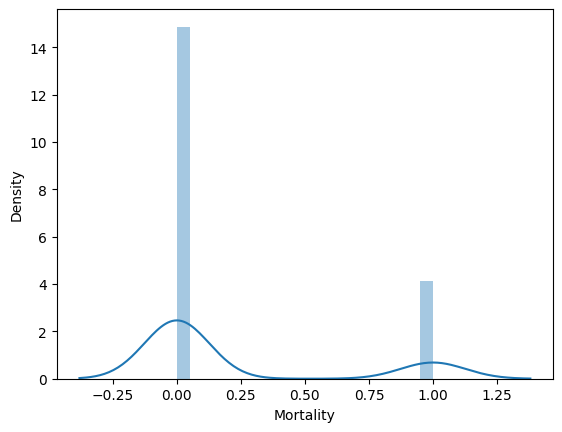

In [18]:
sns.distplot(train_df['Mortality'])

In [19]:
X=train_df.drop(['Mortality'],axis=1)
y=train_df['Mortality']

In [20]:
X

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Follow.Up
0,45,2,0,0,0,0,0,0,1,1,...,1,3.0,2,0,7,2,1,4,0,60
1,51,3,0,1,0,0,0,0,1,1,...,1,1.2,2,0,7,2,1,4,0,15
2,55,3,0,0,0,1,1,0,1,1,...,1,3.4,2,0,3,2,1,4,0,6
3,55,3,0,0,0,1,1,0,1,1,...,1,2.0,2,1,7,3,1,4,0,52
4,56,3,0,0,0,1,0,0,1,1,...,1,4.0,3,2,7,3,1,4,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,3,1,1,0,0,0,0,1,0,...,0,0.5,2,0,7,3,0,0,1,60
364,55,3,1,0,0,1,0,0,1,1,...,0,2.0,2,3,7,3,1,6,1,36
365,58,3,1,1,0,0,0,0,1,1,...,0,0.8,1,3,3,1,1,1,1,32
366,58,3,1,1,0,0,0,0,1,1,...,0,2.6,2,0,7,4,1,1,1,32


In [21]:
y

,Mortality
0,0
1,0
2,0
3,0
4,0
...,...
363,0
364,0
365,0
366,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [24]:
X_train

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Follow.Up
194,40,1,1,1,0,0,0,1,1,1,...,0,0.0,1,0,7,1,1,1,1,36
181,62,4,0,0,0,1,1,0,1,1,...,0,1.2,2,1,7,2,1,4,0,52
36,50,2,1,1,0,0,0,0,1,1,...,0,0.0,1,1,3,1,1,1,1,29
10,59,3,0,0,0,1,1,0,1,1,...,1,0.0,2,0,3,1,1,4,0,52
61,54,3,1,1,0,0,1,0,1,1,...,1,2.2,2,1,7,1,1,5,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,65,4,1,1,0,0,0,1,1,1,...,0,1.4,2,1,3,1,1,6,1,12
320,54,3,1,1,0,0,1,0,1,1,...,1,3.2,2,2,3,3,1,1,1,15
15,62,4,0,1,0,0,0,0,1,1,...,0,3.6,3,2,3,3,1,4,0,15
125,66,4,1,1,0,0,1,0,0,0,...,1,0.1,1,1,3,2,1,1,1,36


In [25]:
y_train

,Mortality
194,0
181,1
36,0
10,1
61,0
...,...
123,0
320,0
15,0
125,0


In [26]:
X_test

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Follow.Up
212,55,3,1,0,0,1,0,0,1,1,...,0,2.0,2,3,7,3,1,6,1,36
366,58,3,1,1,0,0,0,0,1,1,...,0,2.6,2,0,7,4,1,1,1,32
98,59,3,1,1,0,1,1,0,1,1,...,0,0.8,1,2,3,1,1,5,1,15
249,63,4,0,0,0,1,0,0,1,1,...,1,0.0,2,0,3,1,1,4,0,34
187,65,4,0,1,0,0,0,0,1,1,...,0,1.0,2,3,7,4,1,4,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,50,2,1,1,0,1,0,0,0,0,...,1,0.9,2,0,7,3,1,1,1,52
338,63,4,0,0,0,1,0,0,1,1,...,1,0.0,2,0,3,1,1,4,0,34
247,63,4,0,0,0,1,1,1,1,1,...,0,4.0,2,3,7,4,1,4,0,8
266,50,2,1,1,0,0,0,0,1,0,...,0,1.2,2,0,7,1,1,1,1,52


In [27]:
y_test

,Mortality
212,0
366,0
98,0
249,0
187,0
...,...
154,0
338,0
247,1
266,1


## Algorithms

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0])

In [32]:
from sklearn.metrics import classification_report


In [33]:
y_test.shape

(111,)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        86
           1       1.00      0.16      0.28        25

    accuracy                           0.81       111
   macro avg       0.90      0.58      0.58       111
weighted avg       0.85      0.81      0.75       111



In [35]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test,predictions)

In [37]:
cm

array([[86,  0],
       [21,  4]])

In [38]:
logmodel.score(X_test,y_test)

0.8108108108108109

k-nearest neighbour

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,
                                  metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_test)

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[79  7]
 [14 11]]


In [43]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        86
           1       0.61      0.44      0.51        25

    accuracy                           0.81       111
   macro avg       0.73      0.68      0.70       111
weighted avg       0.80      0.81      0.80       111



In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8108108108108109


Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
predictions = dtc.predict(X_test)

In [47]:
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0])

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        86
           1       0.87      0.80      0.83        25

    accuracy                           0.93       111
   macro avg       0.91      0.88      0.89       111
weighted avg       0.93      0.93      0.93       111



In [49]:
print(confusion_matrix(y_test,predictions))

[[83  3]
 [ 5 20]]


In [50]:
dtc.score(X_test,y_test)

0.9279279279279279

Random Forests

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
rfc_pred = rfc.predict(X_test)

In [53]:
print(confusion_matrix(y_test,rfc_pred))

[[85  1]
 [ 6 19]]


In [54]:
rfc.score(X_test,y_test)

0.9369369369369369

Naive_Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[79  7]
 [14 11]]


In [57]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        86
           1       0.61      0.44      0.51        25

    accuracy                           0.81       111
   macro avg       0.73      0.68      0.70       111
weighted avg       0.80      0.81      0.80       111



In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.8108108108108109


ANN

In [59]:
from sklearn.neural_network import MLPClassifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam',
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200, shuffle=True,
                               random_state=10)
ann_classifier.fit(X_train, y_train)

MLPClassifier(random_state=10)

In [60]:
y_pred = ann_classifier.predict(X_test)

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[85  1]
 [25  0]]


In [62]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87        86
           1       0.00      0.00      0.00        25

    accuracy                           0.77       111
   macro avg       0.39      0.49      0.43       111
weighted avg       0.60      0.77      0.67       111



In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.7657657657657657


ANN_2

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(4, kernel_initializer='uniform', activation='relu', input_dim=59))
classifier.add(Dense(4, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=["Accuracy"])

classifier.fit(X_train, y_train, batch_size=20, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.7268 - loss: 0.8441
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7492 - loss: 0.5870  
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7204 - loss: 0.6025 
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7832 - loss: 0.5463 
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7756 - loss: 0.5425 
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7542 - loss: 0.5824 
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7775 - loss: 0.5612 
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7815 - loss: 0.5399 
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7620 - loss: 0.5616 
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8027 - loss: 0.5003 
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7700 - loss: 0.5367 
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 

In [66]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100}%')

Model Accuracy: 82.43243243243244%


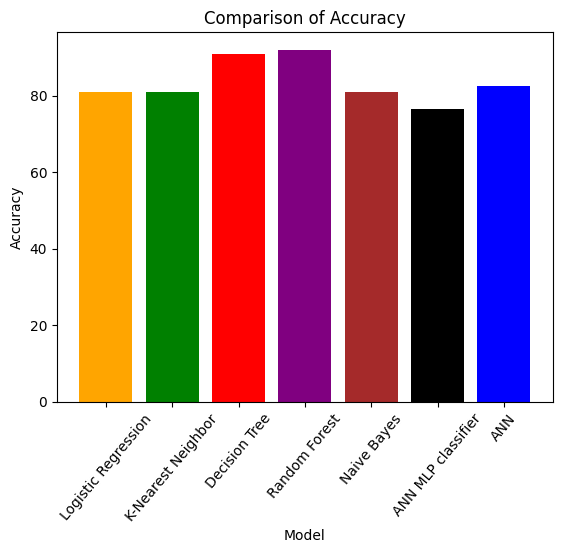

In [69]:
import matplotlib.pyplot as plt
labels = ['Logistic Regression','K-Nearest Neighbor','Decision Tree','Random Forest','Naive Bayes','ANN MLP classifier','ANN']
accuracy_scores = [81.0, 81.0, 91.0, 92.0, 81.0, 76.5, 82.43]
plt.bar(range(len(labels)), accuracy_scores, color=['orange', 'green', 'red', 'purple', 'brown', 'black', 'blue'])
plt.xticks(range(len(labels)), labels, rotation=50)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.show()
